In [1]:
INPUT_PATH = '/Volumes/SPACE/02_PROJECT/02_02_ACTIVE/02_FOREST_HYPE/CROPPED_RAW_RGB/'

In [2]:
import os
import numpy as np

from skimage.io import imread
import matplotlib.pyplot as plt

from local_maxima import itcd as itcd_lm
from thresholding_watershed import itcd as itcd_tw

In [3]:
IMAGE_PATH = 'cropped_flight3/cropped_DJI_0423.jpg'

In [4]:
image = imread(os.path.join(INPUT_PATH, IMAGE_PATH))

In [5]:
crowns_lm = itcd_lm(image, smoothing=50, min_crown=50, max_crown=300, fitting=0.99, sharpness=100)

In [6]:
crowns_tw = itcd_tw(image, smoothing=50)

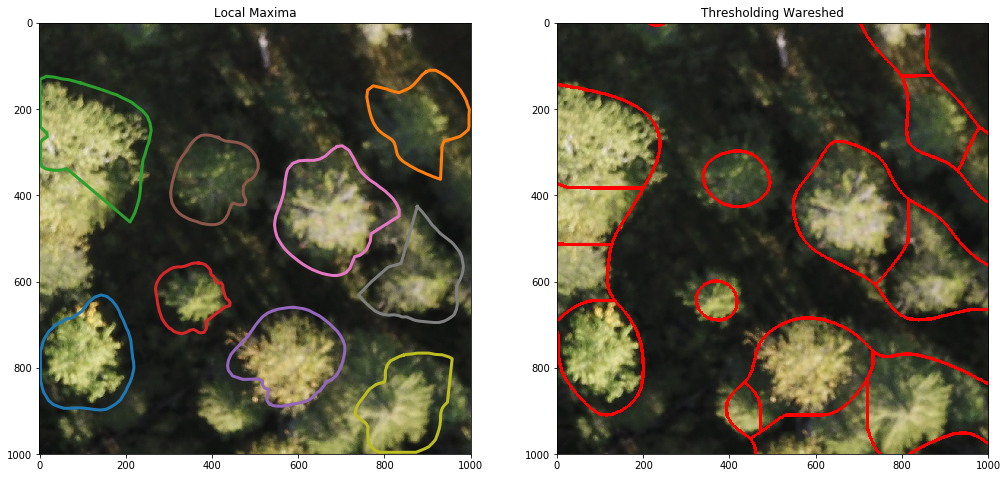

In [7]:
plt.figure(figsize=(17,10))
plt.subplot(121)
plt.imshow(image)
for crown in crowns_lm:
    plt.plot(crown[:,0], crown[:,1], linewidth=3)
plt.title('Local Maxima')
plt.subplot(122)
crowns_map = np.copy(image)
crowns_map[np.where(crowns_tw==True)] = (255, 0, 0)
plt.imshow(crowns_map)
plt.title('Thresholding Wareshed')
plt.show()